# Accept/Reject

$ L(y|\theta)$ is proportional to the likelihood function, which is $(\frac{1}{2}+\frac{\theta}{4})^{125}(\frac{1}{4}(1-\theta))^{18}  (\frac{1}{4}(1-\theta))^{20}(\frac{\theta}{4})^{34}$. As $\theta$ comes from a uniform distribution and $p(\theta)$ is constant, the posterior is also proportional to the likelihood and we set the normalizing constant to the maximum of likelihoods(#1 in the code). I choose the uniform distribution as the proposal distribution to match the prior.(#2) Then I generate the samples ($\theta^*$) from the proposal distribution(#3). Then Accept the generated samples with probability generated from proposal(uniform) distribution(#4). 

max_likelihood:  4.557454103360986e-90


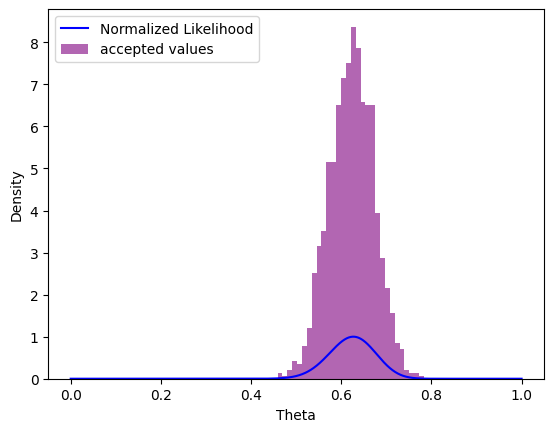

Number of accepted samples: 1291
Mean of accepted theta samples: 0.6229609736648392
Standard deviation of accepted theta samples: 0.049573129066951716


In [36]:
import numpy as np
import matplotlib.pyplot as plt


y = np.array([125, 18, 20, 34])


def likelihood(theta, y):
    p = np.array([1/2 + theta/4, 1/4 * (1 - theta), 1/4 * (1 - theta), theta/4])
    l = np.prod(p**y)
    return l


theta_values = np.linspace(0, 1, 1000)
likelihood_values = np.array([likelihood(theta, y) for theta in theta_values])
max_likelihood = np.max(likelihood_values) #1
print('max_likelihood: ', max_likelihood)

n_samples = 10000
accepted_theta = []

for _ in range(n_samples):
    theta_proposal = np.random.uniform(0, 1) #2 #3
    l = likelihood(theta_proposal, y)
    normalized_l = l / max_likelihood #1
    accept_prob = np.random.uniform(0, 1)
    if normalized_l > accept_prob: #4
        accepted_theta.append(theta_proposal)

accepted_theta = np.array(accepted_theta)
normalized_likelihood_values = likelihood_values / max_likelihood


plt.plot(theta_values, normalized_likelihood_values, label='Normalized Likelihood', color='blue')
plt.hist(accepted_theta, bins=30, density=True, alpha=0.6, color='purple', label = 'accepted values')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.legend()
plt.show()


print(f"Number of accepted samples: {len(accepted_theta)}")
print(f"Mean of accepted theta samples: {np.mean(accepted_theta)}")
print(f"Standard deviation of accepted theta samples: {np.std(accepted_theta)}")


# Importance Sampling

Like the previous method, I use uniform distribution as the proposal. After sampling from the uniform(proposal) distribution, we have to compute a weight for each sampled value of $\theta$. The weights should be proportional to the ratio of the target posterior and the proposal distribution at each sample $\theta_i$. The prior and the proposal are uniform; therefore, the weight is proportional to the posterior which is proportional to the likelihood. Then we normalize the weights and estimate the expected value of theta using the normalized weights. 

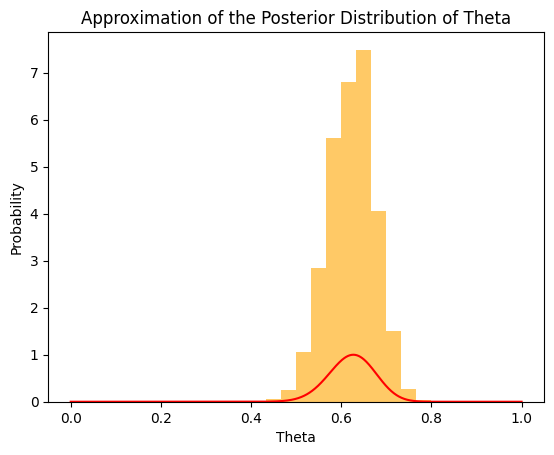

Sum of normalized weights: 1.0
Weighted average of theta samples: 0.6229896386579644


In [35]:

# Step 1: Choose a proposal distribution q(theta)
# Here, we use the uniform distribution U[0, 1] as our proposal distribution,
# which is also the prior distribution in this case.

# Step 2: Generate samples from the proposal distribution
N = 10000  # Number of samples to draw
theta_samples = np.random.uniform(0, 1, N)  # Sampling from U[0, 1]

# Step 3: Calculate weights for each sample based on the likelihood of the data given theta
weights = np.array([likelihood(theta, y) for theta in theta_samples])

# Step 4: Normalize the weights to convert them into a probability distribution
weights_normalized = weights / np.sum(weights)

# Step 5: Estimate the posterior distribution using the weighted samples
# Visualization: Plotting the weighted samples to approximate the posterior distribution
plt.hist(theta_samples, bins=30, weights=weights_normalized, density=True, alpha=0.6, color='orange')
plt.plot(theta_values, normalized_likelihood_values, label='Normalized Likelihood', color='red')
plt.title('Approximation of the Posterior Distribution of Theta')
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.show()


print("Sum of normalized weights:", weights_normalized.sum())
print("Weighted average of theta samples:", np.average(theta_samples, weights=weights_normalized))


# Comparison of Efficiency

In Accept/Reject, the fraction of accepted samples can be much lower than the total number of generated samples. Here 1291 out of 10000 samples are accepted and the acceptance rate is 12.91%.
However Importance Sampling uses all generated samples by assigning them weights, leading to potentially higher efficiency in sample utilization.
On the other hand, Accept/Reject kind of directly samples from the target distribution, which leads to high accuracy without bias, while in Importance Sampling accuracy depends on the match between the proposal and target distributions. If the proposal distribution is not a good match, then we will have a high variance in weights and therefore less accuracy in estimation. 
